# <center> Machine Learning Programming Exercise 5:</center> 
# <center> <ins>Supervised classification </ins></center> 

| <font size=6,font color='red'>Monôme / binôme</font> | <font size=6,font color='red'>Noms</font> | <font size=6,font color='red'>Prénoms</font>   |
|:-------------:     |:-----------   |:------  |
| monôme/binôme 1  | <span style="color:red">Remplacer ici</span> | <span style="color:red">et ici</span>     |
| binôme 2         | <span style="color:red">Remplacer ici</span> | <span style="color:red">et ici</span>     | 


## 1. Objectifs


Nous allons dans ce TP classer automatiquement des patchs extraits d'images sonar (cf. figure ci-dessous) en types de fond marin (roches, sables, vases, rides de sable verticales et à 45°, [Posidonie](https://fr.wikipedia.org/wiki/Posidonia_oceanica)).

Quelques exemples de patchs d'image sonar de fond marin:

<img src="https://drive.google.com/uc?export=view&id=1cS7gN2XAYBMmcmyhUjmtQRDlL44_wERM" style="width:600px;height:400px ;" />

L'objectif est d'écrire un ou plusieurs scripts permettant de mettre en oeuvre un système basé sur différentes approches supervisées de machine learning. Ces scripts devront ainsi suivre la chaîne générale décrite en cours (à l'exception de la phase de captation; cf. figure ci-dessous ) :
* prétraitements
* extraction des descripteurs
* apprentissage d'un modèle de classement
* classement des patchs
* évaluation du classifieur appris
* comparaison et analyse des performances de différents classifieurs

<img src="https://drive.google.com/uc?export=view&id=1yz-HuFs3zn7Q_AwXflOqdFFjyEAocf1s" />

Le TP est globalement organisé de la manière suivante:

**Données**

Il s'agira d'entraîner les classifieurs à partir de descripteurs extraits grâce à un algorithme performant d'analyse de textures appelé [scattering operator](https://www.di.ens.fr/data/scattering) (le fonctionnement exact n'est pas au programme mais il s'apparente à des bancs de filtres (succession de filtres) ; à chaque niveau un ou plusieurs descripteurs sont calculés). 
 
**Prétraitements**

Aucun autre prétraitement ne sera réalisé. 

**Ensembles de données**

Les deux ensembles de données (apprentissage et test) seront composés de 2/3 et 1/3 de la base totale d'images. 

**Algorithmes** 

Concernant les algorithmes supervisés de machine learning, l'objectif est de découvrir le package python [scikit-learn](http://scikit-learn.org/stable/user_guide.html) qui vous permettra d'utiliser les algorithmes de [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).


**Travail demandé**

<span style="color:red">**Dans cet exercice, il vous est demandé de fournir un seul rapport regroupant les réponses aux questions, vos analyses et vos codes. Ce rapport pourra prendre la forme d'un jupyter notebook ou d'un pdf. Il est de plus conseillé de faire tourner les codes sur [google colab](https://colab.research.google.com/?hl=fr) si votre machine manque de puissance (dans ce cas un jupyter notebook est nécessaire). Il est également conseillé de répondre aux questions par des phrases pour obtenir la totalité des points**.</span>



## Fichiers inclus dans le starter code pour cette séance
* **seafloorClassification_data.npz** - fichier contenant les données nécessaires



# 2. Découverte de la base de patchs

## 2.1 Imports des packages python


In [2]:
# on supprime les warnings pénibles de scikit-learn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# numpy
import numpy as np

# links with google drive and colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')	
  import sys
  code_folder = '/content/gdrive/My Drive/Colab Notebooks/ex06_supervised_seabedClassification/'
  sys.path.append(code_folder)
  # !ls "/content/gdrive/My Drive/Colab Notebooks/ex06_supervised_seabedClassification"
  %cd "$code_folder"
  !ls "$code_folder"
   

## 2.2 Chargement et examen des données

**Utiliser les lignes de code suivantes permettant de charger les données comprises dans le fichier __seafloorClassification_data.npz__**

In [3]:
# ---------------------------------------------------------------------------------------------------------------
# LOAD Data, Features, Labels
# ---------------------------------------------------------------------------------------------------------------

tmp = np.load('seafloorClassification_data.npz',allow_pickle=True)

image_values = tmp['image_values'] # images sonar
label_names = tmp['label_names'] # types de fond marin
feature_values = tmp['feature_values'] # features extraits avec le scaterring operator
instance_nb = tmp['instance_nb'] # nb d'images sonar
feature_nb = tmp['feature_nb'] # nb de features


##### **<ins>Question 2.2.1:</ins> Ecrire du code permettant d'afficher quelques patchs (comme la première image de ce notebook, chaque patch a une taille de 200x200)**

**_Your commented code below_**

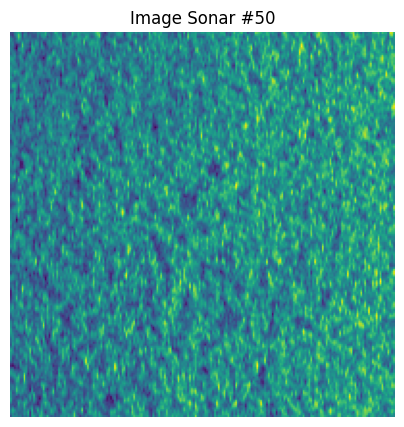

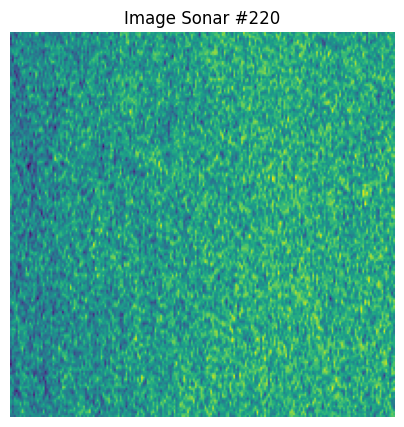

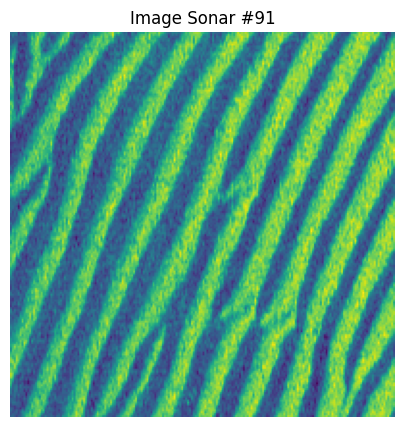

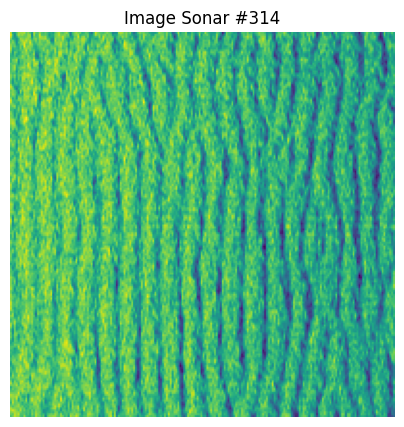

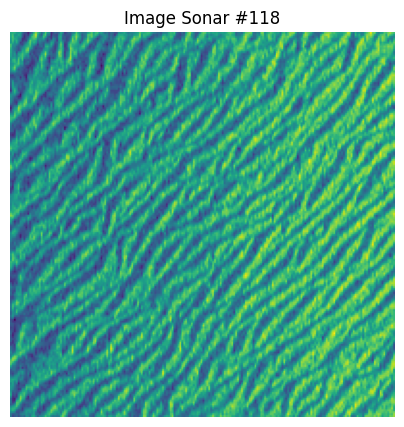

In [20]:
# ----------- Your code here --------------------->
import matplotlib.pyplot as plt



# On reshape notre matrice pour avoir nos images en 200x200 pixels
image_values_reshaped = image_values.reshape(-1, 200, 200)

# Afficher quelques patchs d'images sonar
num_patches_to_display = 5  
random_index_tab = []
for i in range(num_patches_to_display):
    # Random index
    random_index = np.random.randint(0, len(image_values_reshaped))
    image_patch = image_values_reshaped[random_index]
    random_index_tab.append(random_index)

    # Affichage
    plt.figure(figsize=(5, 5))
    plt.imshow(image_patch)  
    plt.title(f'Image Sonar #{random_index}')
    plt.axis('off')
    plt.show()




# ------------------------------------------------>

**<ins>Question 2.2.2: </ins> Ecrire du code permettant de donner quelques statistiques de chaque descripteur extrait des images grâce au scattering operator.**

**_Your commented code below_**

In [4]:
# ----------- Your code here --------------------->

for nb_feature in range(feature_nb):
    features_stats = feature_values[: , nb_feature]

    print("Feature", nb_feature)
    print("Ecart-type:", np.std(features_stats))
    print("Moyenne:", np.mean(features_stats))
    print("Median:", np.median(features_stats))

# ------------------------------------------------>

Feature 0
Ecart-type: 178.55727141093564
Moyenne: 1976.764728305124
Median: 1940.9969039461025
Feature 1
Ecart-type: 9.98416952667193
Moyenne: 30.605339159653763
Median: 28.211177297168398
Feature 2
Ecart-type: 13.396320735374514
Moyenne: 21.486941156728236
Median: 15.359648942141654
Feature 3
Ecart-type: 11.027577810406473
Moyenne: 30.876079604633407
Median: 27.61810908300077
Feature 4
Ecart-type: 10.259108518958692
Moyenne: 43.39810779837543
Median: 42.35776872917822


**<ins>Question 2.2.3: commentez ces statistiques</ins>** 

**_Double cliquez ici pour écrire votre réponse ici!_**


## 3. Traitements

## 3.1 Normalisation des descripteurs 

**<ins>Question 3.1.1:</ins> Écrire des lignes de code permettant de [centrer et réduire](https://scikit-learn.org/stable/modules/preprocessing.html) les données si besoin. Proposez et mettez en oeuvre un procédé pour vérifier cette normalisation.**


**_Your commented code below_**

In [7]:
# ----------- Your code here --------------------->
def featureNormalize(X):
    """ returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """

    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm / sigma

# ============================================================
    return X_norm, mu, sigma

# Appel de la fonction featureNormalize
features_normalises, moyennes, ecarts_types = featureNormalize(feature_values)

# Affichage des features normalisées, des moyennes et des écart-types
print("Features values\n", feature_values)
print("Features normalisées :\n", features_normalises)
print("Moyennes des features :", moyennes)
print("Écart-types des features :", ecarts_types)

# ------------------------------------------------>

Features values
 [[2235.23367743   24.53921882   15.84182611   24.15861988   35.67798889]
 [2206.12761044   24.72801075   15.69163074   24.81547512   37.70520669]
 [2017.20962463   31.251256     20.26854531   31.98372389   48.56440003]
 ...
 [1752.80799195   28.48298155   14.665698     26.97256484   45.31393975]
 [2023.11763567   33.57794616   14.62906114   33.01641511   54.54804887]
 [1784.73355461   38.66427876   15.81285086   41.96226939   71.44813358]]
Features normalisées :
 [[ 1.445529   -0.60672941 -0.42080727 -0.60830434 -0.75146774]
 [ 1.28274866 -0.58784657 -0.43200338 -0.54882235 -0.55414062]
 [ 0.22619456  0.06460418 -0.09082363  0.10030352  0.50288111]
 ...
 [-1.25251393 -0.21227683 -0.50848011 -0.35348555  0.18648494]
 [ 0.25923606  0.29731822 -0.51121115  0.1938196   1.08532279]
 [-1.0739651   0.8060499  -0.42296719  1.00391779  2.73035813]]
Moyennes des features : [1976.76472831   30.60533916   21.48694116   30.8760796    43.3981078 ]
Écart-types des features : [178.805

**<ins>Question 3.1.2</ins>: Pourquoi doit-on faire cette normalisation?**


Cette normalisation des données nous permet de mettre en forme les données pour anticiper un possible sur-apprentissage ou bien sous-apprentissage. 

## 3.2 Séparation des données en ensembles 

**<ins>Question 3.2.1:</ins> Écrire des lignes de code permettant de [créer deux ensembles](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split): un pour l'apprentissage et un pour le test en proportions 2/3-1/3.**


Dans le code ci-dessous, on cherche à créer deux ensembles pour les images, les étiquettes et les caractéristiques, soit images_values, label_names, feature_values. La fonction train_test_split nous ressort donc les données d'apprentissage et les données de test sous bonne proportion en renseignant test_size à 1/3.

In [8]:
# ----------- Your code here --------------------->
from sklearn.model_selection import train_test_split

# On spécifie test_size=1/3 pour respecter les proportions de la question 
image_train, image_test, label_train, label_test, feature_train, feature_test = train_test_split(
    image_values, label_names, feature_values, test_size=1/3, random_state=42
)

# ------------------------------------------------>

**<ins>Question 3.2.2:</ins> Pourquoi doit-on faire cela?**

Cette séparation des données nous permet d'avoir un ensemble sur lequel notre modèle pourra s'entraîner/apprendre et un autre ensemble constitué de données qu'il n'a jamais vu sur lequel on pourra voir de quelle manière se comporte notre modèle. De plus, le faite de diviser les données permet d'éviter l'overfitting de notre modèle.

### 3.3 Gestion des labels

**<ins>Question 3.2.3:</ins> Écrire des lignes de code permettant de disposer des labels pour chaque ensemble de données dans différents [codages](https://scikit-learn.org/stable/modules/preprocessing_targets.html) (noms vers indices, indices vers [one-hot-encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features), noms vers one-hot-encoding).**


**_Your commented code below_**

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

# Apprentissage 

# Label Encoding
label_encoder_train = LabelEncoder()
indices_train = label_encoder_train.fit_transform(label_train)

# One-Hot Encoding des Indices
onehot_encoder_train = OneHotEncoder(sparse=False)
indices_onehot_train = onehot_encoder_train.fit_transform(indices_train.reshape(-1, 1))

# One-Hot Encoding des Noms
label_binarizer_train = LabelBinarizer()
noms_onehot_train = label_binarizer_train.fit_transform(label_train)

# Test 

#  Label Encoding
indices_test = label_encoder_train.transform(label_test)

# One-Hot Encoding des Indices
indices_onehot_test = onehot_encoder_train.transform(indices_test.reshape(-1, 1))

# One-Hot Encoding des Noms
noms_onehot_test = label_binarizer_train.transform(label_test)

print(indices_train)
print(indices_onehot_train)
print(noms_onehot_train)
print(indices_test)
print(indices_onehot_test)
print(noms_onehot_test)

# ------------------------------------------------>

[1 0 0 3 4 2 2 5 4 0 1 2 0 5 2 0 3 1 1 3 4 4 4 5 4 1 1 5 1 3 5 1 4 1 0 0 3
 3 1 2 2 5 3 3 3 5 1 2 3 2 3 2 5 5 4 5 3 0 0 4 2 1 3 4 4 1 2 2 5 2 3 5 5 3
 5 0 1 5 4 5 3 5 5 2 3 1 5 0 1 5 1 5 4 3 4 2 0 2 1 5 1 4 1 3 0 0 0 3 3 3 4
 4 3 5 0 5 1 5 3 4 3 0 1 5 4 3 0 2 3 5 5 0 0 2 2 2 1 4 2 4 3 1 4 1 0 0 4 2
 0 5 4 5 3 2 3 1 3 3 0 1 0 3 0 2 5 4 5 2 4 4 4 2 5 2 2 5 4 3 0 4 4 5 1 0 0
 0 1 4 0 5 1 0 5 5 0 2 1 5 3 2 3 2 2 2 5 0 0 3 4 2 4 3 0 0 4 5 0 2 3 5 4 5
 5 2 3 3 3 1 1 2 4 3 2 0 4 1 1 5 2 1]
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
[[0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]]
[4 0 5 2 0 5 0 0 5 3 1 2 4 2 1 3 4 2 3 2 3 4 2 0 5 4 3 2 0 1 5 0 2 3 1 0 0
 2 1 1 4 0 2 1 3 4 0 0 0 2 5 4 4 1 2 5 0 1 1 5 1 0 4 1 1 1 2 4 2 1 4 4 5 2
 4 1 4 2 0 1 3 0 4 3 2 2 3 3 1 5 1 1 5 1 4 4 0 3 0 1 2 4 4 3 3 4 2 5 3 5 3
 4 0 5 1 3 0 2 1 5]
[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0

**<ins>Question 3.2.4:</ins> Etudiez la répartition du nombre de données (d'images) pour chaque <ins>type de fonds marins et pour chaque ensemble de données</ins>. Est-ce important? Pourquoi?**

**_Your commented code below_**


In [21]:
# ----------- Your code here --------------------->


# ------------------------------------------------>

IndexError: index 5 is out of bounds for axis 0 with size 5

**_Double cliquez ici pour écrire votre réponse ici!_**


## 4. Approche supervisée à partir des descripteurs du scattering operator

## 4.1 Apprentissage des classifieurs


**<ins>Question 4.1.1:</ins> Faire la liste expliquée des hyper-paramètres (paramètre uniquement lié à l'algorithme d'apprentissage) les plus importants des algorithmes: [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).Vous vous concentrerez sur les hyperparamètres que nous avons rencontré précédemment (cours et TPs).**

**_Double cliquez ici pour écrire votre réponse ici!_**



**<ins>Question 4.1.2</ins>: Réalisez l'apprentissage successif des modèles: régression logistique, réseaux de neurones, svm et random forest en utilisant les fonctions du package scikit-learn. Les valeurs des hyper-paramètres seront choisis comme les valeurs par défaut de scikit-learn.**

**_Your commented code below_**

**<ins>Question 4.1.3</ins>: A l'aide des fonctions fournies, évaluer les modèles appris avec la procédure d'évaluation des performances pour les grands jeux de données en calculant et en affichant la matrice de confusion, puis les [métriques extraites de cette matrice](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Commenter.**

**_Your commented code below_**

In [ ]:
# ----------- Your code here --------------------->



# ------------------------------------------------>

## 4.2 Première évaluation (biaisée) des classifieurs

**<ins>Question 4.2.1</ins>: Le jeu de données étant petit, la procédure précédente n'est pas adaptée. Vous évaluerez les performances par [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html\#computing-cross-validated-metrics) et reporterez la moyenne et l'écart-type de la métrique `accuracy`. Commenter**

**_Your commented code below_**

In [ ]:
# ----------- Your code here --------------------->


# ------------------------------------------------>

**_Double cliquez ici pour écrire votre réponse ici!_**



## 4.3 Optimisation des hyper-paramètres du modèle

Le jeu de données étant très petit, la valeur des hyper-paramètres doit être fixée de manière optimale en évaluant les modèles par cross validation sur l'ensemble de training.

**<ins>Question 4.3.1</ins>:** Lisez le [tutoriel suivant](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) en faisant particulièrement attention à la façon dont est gérée la détermination des hyperparamètres et l'évaluation des performances. Reproduisez cette méthodologie en testant différents nombres de plis (fold):
* pour la **<ins>Régression logistique:</ins>**:
    * C: 0.001, 0.01,0.1,1,10
    * penalty = 'l1', 'l2', 'elasticnet', 'None'
    
* pour le **<ins>réseau de neurones</ins>:**
    * hidden_layer_sizes: une couche de 100 neurones, 2 couches de 100 neurones, 3 couches de 100 neurones
    * activation: 'logistic', 'tanh', 'relu'
    * alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10

* pour le **<ins>Random Forest</ins>:**
    * n_estimators: 1, 10, 100, 500, 1000
    * max_depth: 5, 10, 20
    * min_samples_leaf: 1, 5, 10

* pour le **<ins>SVM</ins>:**
    * kernel: 'rbf' 
    * C: 1e3, 5e3, 1e4, 5e4, 1e5, 1e6
    * gamma: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5


N'hésitez pas à fixer le paramètre `verbose` pour comprendre ce qui est fait.

**_Your commented code below_**

In [ ]:
# ----------- Your code here --------------------->


        
# ------------------------------------------------>        

**<ins>Question 4.3.2</ins>: Donner la valeur des paramètres optimaux pour chaque classifieur.**

_Your commented code below_

In [ ]:
# ----------- Your code here --------------------->

# ------------------------------------------------>

**_Double cliquez ici pour écrire votre réponse ici!_**



**<ins>Question 4.3.3</ins>: Apprendre le modèle final pour chaque classifieur avec les paramètres optimaux et évaluer leurs performances avec les métriques (precision, recall, f1).**


**_Your commented code below_**

In [ ]:
# ----------- Your code here --------------------->

         
 # ------------------------------------------------>

## 4.4 Evaluation optimale pour les petits jeux de données

**<ins>Question 4.4.1</ins>: Les performances espérées par le modèle final sont biaisées car nous avons un petit jeu de données et nous avons évaluées les performances sur des données vues lors de l'apprentissage ou pour fixer les hyperparamètres. La procédure adaptée pour évaluer proprement les performances dans ce cas se nomme validations croisées imbriquées. Le tutoriel [Nested Cross-Validation for Machine Learning with Python](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/) décrit cette procédure. Evaluer les performances pour une validation croisée extérieure (outer) de 4 et intérieure (inner) de 3**.


In [ ]:
# ----------- Your code here --------------------->


# ------------------------------------------------>

_Double cliquez ici pour écrire votre réponse ici!_


# 5. Approche supervisée sur données brutes

**<ins>Question 5.1</ins>:** Réalisez l'apprentissage du classifieur random forest en utilisant les fonctions du package scikit-learn sur les valeurs des pixels des images. Pensez vous qu'un autre classifieur donnerait des meilleurs résultats? Analysez les résultats (décrivez et proposez une interprétation de ce qu'il se passe)

In [ ]:
# ----------- Your code here --------------------->



# ------------------------------------------------>


**_Your commented code below_**

**_Double cliquez ici pour écrire votre réponse ici!_**


# 6. Analyse finale

**<ins>Question 6.1</ins>: Faites une synthèse des résultats obtenus. Dresser en particulier des conclusions en fonction des descripteurs utilisés, des algorithmes utilisés (et leurs caractéristiques) et des prétraitements effectués.**

**_Double cliquez ici pour écrire votre réponse ici!_**


# 7. Diagramme fonctionnel

**<ins>Question 7.1</ins>:** Réalisez un diagramme fonctionnel décrivant le flux des données au travers de différents blocs (représentant des fonctions) tout au long de l'approche supervisée. Ce diagramme devra faire apparaître au minimum: les trois ensembles d'images, les descripteurs, le modèle de machine learning appris, les différents algorithmes d'apprentissage, l'évaluation (mettre une image dans le répertoire courant et dans la cellule ci-dessous remplacer par le nom du fichier)

**_Your image here_** <img src="fichierDiagramme.png" />

**<ins>Question 7.2</ins>:**  Mettez vous dans le cadre d'**un jeu de données de grande taille** et réalisez un autre diagramme fonctionnel répondant à la question précédente. 

**_Your image here_** <img src="fichierDiagramme2.png" />